# Black-Scholes Model
André Guerra \
October, 2022 \
andre.guerra@mail.mcgill.ca

This notebook contains an example of the Black-Scholes model in pricing options.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# CONSTANTS
# 1. Visualization constants
# a. sizing factors
TICKSFONT = 13
TITLEFONT = 15
TEXTFONT = 15
FIGWIDTH = 6.4
FIGHEIGHT = 4.8
LINEWIDTH = 3
ROLLWINDOW = 100
# b. zoom factors
ZOOMIN = 1.5
ZOOMOUT = 10

## Function definitions

In [3]:
def black_scholes_option(So, K, T, r, q, sigma, type):
    """Black-Scholes option price for CALL and PUT options

    Args:
        So (float):     Current stock price
        K (float):      Strike price
        T (float):      Time to expiration [years]
        r (float):      Risk free interest
        q (float):      Dividend yield
        sigma (float):  Volatility
        type (string):  Type of option ['CALL', 'PUT']

    Returns:
        option_price (float): Predicted option price at expiration
    """
    d1 = (np.log(So/K) + (r - q + (sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if type == 'CALL':
        option_price = So*norm.cdf(d1)*np.exp(-q*T) - norm.cdf(d2)*K*np.exp(-r*T)
    elif type == 'PUT':
        option_price = norm.cdf(-d2)*K*np.exp(-r*T) - So*norm.cdf(-d1)*np.exp(-q*T)
    return option_price

# Class definitions

In [26]:
class BlackScholesOption():
    def __init__(self, So, K, T, r, q, sigma, type):
        self.So = So
        self.K = K
        self.T = T
        self.r = r
        self.q = q
        self.sigma = sigma
        self.type = type
    
    def attributes(self):
        return {'So':self.So,
                'K':self.K,
                'T':self.T,
                'r':self.r,
                'q':self.q,
                'sigma':self.sigma,
                'type':self.type}
    
    def d1(self):
        d1 = (np.log(self.So/self.K)+
              (self.r - self.q + (self.sigma**2)/2)*self.T)/(self.sigma*np.sqrt(self.T))
        return d1
    
    def d2(self):
        d2 = self.d1() - self.sigma*np.sqrt(self.T)
        return d2
    
    def option_value(self):
        if self.type == 'CALL':
            value = self.So*norm.cdf(self.d1())*np.exp(-self.q*self.T) \
                - norm.cdf(self.d2())*self.K*np.exp(-self.r*self.T)
        elif self.type == 'PUT':
            value = norm.cdf(-self.d2())*self.K*np.exp(-self.r*self.T) \
                - self.So*norm.cdf(-self.d1())*np.exp(-self.q*self.T)
        return value
    

## The Black-Scholes model for option pricing
The Black-Scholes model is used to predict the prices of options based on various parameters that quantify the option contract and other market variables. The model assumes that prices of the underlying asset (e.g., stock) occur in a log-normal distribution given a random walk of underlying asset prices. The random walk values are given by Geometric Brownian Motion (GMB) stochastic model (see `stochastic_models.ipynb`). The assumption of the lognormal distribution is important, as the underlying assets can only take positive values and they tend towards the initial value, $S_o$, (positive skewness).

### Model definition

$CALL = S_oN(d_1)e^{-qT} - N(d_2)Ke^{-rT}$

$PUT = N(-d_2)Ke^{-rT} - N(-d_1)S_oe^{-qT}$

$d_1 = \frac{ln\left ( \frac{S}{K} \right )+(r-q+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$

$d_2 = d_1 - \sigma \sqrt{T}$

*Note*: stocks that offer no dividends, $q=0$, while stocks that offer dividends, $q>0$.

### Model assumptions
1. Risk-free interest and volatility are known and constant
2. Assumes an European option - only exercised at expiry date
3. Underlying asset prices exhibit random behaviour (GBM model)
4. No transaction fees or taxes

*Note*: The BS model has been modified to represent American options and to account for other limitations.

## Effect of model parameters on predicted option price
### 1. Initial stock price, $S_o$

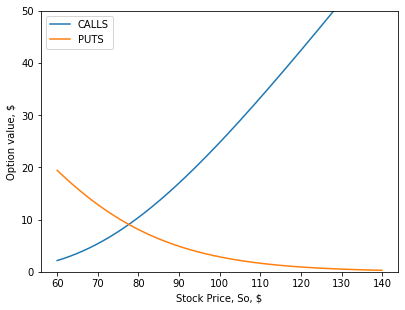

In [5]:
K = 80          # strike price, [$]
T = 1           # option contract expiration time [years]
r = 0.05        # annual risk free interest [0-1]
q = 0.02        # annual dividend rate [0-1]
sigma = 0.3     # annual volatility [0-1]

# range of initial stock prices
So = np.arange(60,140,0.1)

# calculate the black-scholes call and put prices
calls = [black_scholes_option(s,K,T,r,q,sigma,'CALL') for s in So]
puts = [black_scholes_option(s,K,T,r,q,sigma,'PUT') for s in So]

# plot the effect of initial value, So, on the option value at expiration
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(So,calls,label='CALLS')
axs.plot(So,puts,label='PUTS')
axs.set_xlabel("Stock Price, So, $")
axs.set_ylabel("Option value, $")
axs.set_ylim(0,50)
axs.legend()

### 2. Volatility, $\sigma$

/tmp/ipykernel_475120/3985284852.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(So/K) + (r - q + (sigma**2)/2)*T)/(sigma*np.sqrt(T))


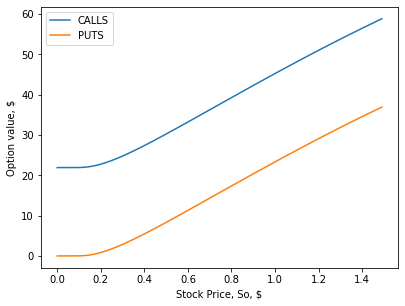

In [6]:
So = 100        # current stock price, [$]
K = 80          # strike price, [$]
T = 1           # option contract expiration time [years]
r = 0.05        # annual risk free interest [0-1]
q = 0.02        # annual dividend rate [0-1]

# range of volatility
sigmas = np.arange(0,1.5,0.01)

# calculate the black-scholes call and put prices
calls = [black_scholes_option(So,K,T,r,q,sigma,'CALL') for sigma in sigmas]
puts = [black_scholes_option(So,K,T,r,q,sigma,'PUT') for sigma in sigmas]

# plot the effect of volatility, sigma, on the option value at expiration
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(sigmas,calls,label='CALLS')
axs.plot(sigmas,puts,label='PUTS')
axs.set_xlabel("Stock Price, So, $")
axs.set_ylabel("Option value, $")
axs.legend()

### 3. Time, $T$

/tmp/ipykernel_475120/3985284852.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(So/K) + (r - q + (sigma**2)/2)*T)/(sigma*np.sqrt(T))


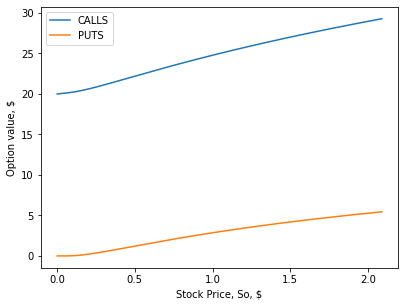

In [7]:
So = 100        # current stock price, [$]
K = 80          # strike price, [$]
r = 0.05        # annual risk free interest [0-1]
q = 0.02        # annual dividend rate [0-1]
sigma = 0.3     # annual volatility [0-1]

# range of expiration time [years]
expiration_dates = np.arange(0,2.1,0.01)

# calculate the black-scholes call and put prices
calls = [black_scholes_option(So,K,T,r,q,sigma,'CALL') for T in expiration_dates]
puts = [black_scholes_option(So,K,T,r,q,sigma,'PUT') for T in expiration_dates]

# plot the effect of expiration time, T, on the option value at expiration
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(expiration_dates,calls)
axs.plot(expiration_dates,puts)
axs.set_xlabel("Stock Price, So, $")
axs.set_ylabel("Option value, $")
axs.legend(['CALLS','PUTS'])

The Black-Scholes (BS) model assumes the volatility to be constant, which is not true in real examples. Below, we import the stock prices for Apple (AAPL) over a long period, and calculate a rolling average of the volatility. This shows how the volatility changes over that period, and how taking the average volatility as a constant value to be used in the BS model hides much of the dynamics behind price of this stock.

Text(0.05, 0.9, '$\\sigma_{ave}$=0.26')

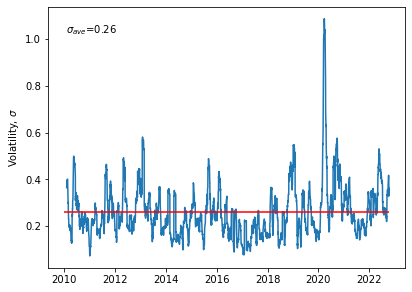

In [8]:
# get stock data for the past ~22 years
ticker = 'AAPL'
start = dt.datetime(2010,1,1)
end = dt.datetime(2022,10,14)
data = web.DataReader(ticker,'yahoo',start,end)

# calculate a rolling average of volatility
data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std()*np.sqrt(255)

# plot the rolling volatility
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(data.rolling_sigma)
axs.set_ylabel('Volatility, $\sigma$')
axs.hlines(data.rolling_sigma.mean(),start,end,'r')
axs.annotate('$\sigma_{ave}$='+str(np.round(data.rolling_sigma.mean(),decimals=2)),
             xy=(0.05,0.9),xycoords='axes fraction')

Plot the closing price and some rolling averages on the closing price.

Text(0.05, 0.9, 'Close$_{ave}$=49.81')

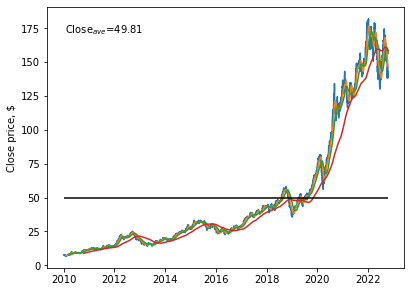

In [9]:
data['MA20_close'] = data['Close'].rolling(20).mean()
data['MA50_close'] = data['Close'].rolling(50).mean()
data['MA200_close'] = data['Close'].rolling(200).mean()

# plot the closing price
NROWS = 1
NCOLS = 1
f, axs = plt.subplots(nrows=NROWS,ncols=NCOLS,
                      figsize=(NCOLS*FIGWIDTH,NROWS*FIGHEIGHT))
axs.plot(data.Close)
axs.plot(data.MA20_close)
axs.plot(data.MA50_close)
axs.plot(data.MA200_close)
axs.set_ylabel('Close price, $')
axs.hlines(data.Close.mean(),start,end,'k')
axs.annotate('Close$_{ave}$='+str(np.round(data.Close.mean(),decimals=2)),
             xy=(0.05,0.9),xycoords='axes fraction')

## Test the OOP version of the Black-Scholes model

In [30]:
So = 100        # current stock price [$]
K = 90          # strike price, [$]
T = 1/2         # option contract expiration time [years]
r = 0.05        # annual risk free interest [0-1]
q = 0.02        # annual dividend rate [0-1]
sigma = 0.25    # annual volatility [0-1]

call_option = black_scholes_option(So,K,T,r,q,sigma,'CALL')
put_option = black_scholes_option(So,K,T,r,q,sigma,'PUT')
oop_call_option = BlackScholesOption(So,K,T,r,q,sigma,'CALL')
oop_put_option = BlackScholesOption(So,K,T,r,q,sigma,'PUT')

print("CALL option: " + str(call_option))
print("PUT option: " + str(put_option))
print("OOP CALL option: " + str(oop_call_option.option_value()))
print("OOP PUT option: " + str(oop_put_option.option_value()))

CALL option: 13.65362772185977
PUT option: 2.426536429492895
OOP CALL option: 13.65362772185977
OOP PUT option: 2.426536429492895
